In [1]:
# Logistic regression (you do not have to do anything in this cell)

# import the libraries that we will need
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Now we load the breast cancer dataset
X, y = datasets.load_breast_cancer(return_X_y=True)

# we will only use the first feature (you should try with others after 
# completing the notebook)
X = X[:,0]

print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)

The shape of X is:  (569,)
The shape of y is:  (569,)


In [5]:
# now we split the data (you do not have to do anything in this cell)

# because we want to use cross validation, 
# we randomly select 10% as test, 10% as validation, and 80% as training
Ntotal = X.shape[0]
Ntest_val = int(Ntotal/5)
Nval = Ntest_val/2
Ntrain = Ntotal - Ntest_val

# now let's generate the indices for the test and val
test_val_idx = np.random.choice(range(Ntotal),Ntest_val,replace=False)
test_idx = test_val_idx[:int(Ntest_val/2)]
val_idx = test_val_idx[int(Ntest_val/2):]

X_ts = X[test_idx]
y_ts = y[test_idx]
X_vl = X[val_idx]
y_vl = y[val_idx]
X_tr = np.delete(X, test_val_idx)
y_tr = np.delete(y, test_val_idx)

print('The shape of X_ts is: ', X_ts.shape)
print('The shape of y_ts is: ', y_ts.shape)
print('The shape of X_vl is: ', X_vl.shape)
print('The shape of y_vl is: ', y_vl.shape)
print('The shape of X_tr is: ', X_tr.shape)
print('The shape of y_tr is: ', y_tr.shape)

# we forget about the testing data for now


# here 1 means that the patient is healthy
# and 0 means that the patient has cancer
plt.scatter(X_tr,y_tr)
plt.xlabel('Patient feature')
plt.ylabel('Healthy or Not healthy')
plt.show()

The shape of X_ts is:  (56,)
The shape of y_ts is:  (56,)
The shape of X_vl is:  (57,)
The shape of y_vl is:  (57,)
The shape of X_tr is:  (456,)
The shape of y_tr is:  (456,)


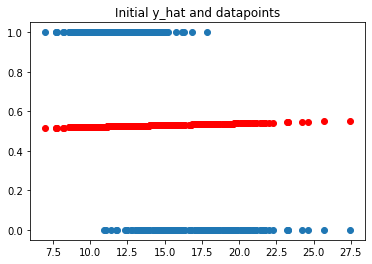

Streaming output truncated to the last 5000 lines.
------------------------------ the MSE (validation) cost is:  0.36283277314408846
At iteration No. 17501 ,the MSE (training) cost is:  0.2874755461541559
------------------------------ the MSE (validation) cost is:  0.36283285538023485
At iteration No. 17502 ,the MSE (training) cost is:  0.28747552955770683
------------------------------ the MSE (validation) cost is:  0.36283293760969904
At iteration No. 17503 ,the MSE (training) cost is:  0.28747551296471185
------------------------------ the MSE (validation) cost is:  0.36283301983248123
At iteration No. 17504 ,the MSE (training) cost is:  0.28747549637517017
------------------------------ the MSE (validation) cost is:  0.36283310204858166
At iteration No. 17505 ,the MSE (training) cost is:  0.28747547978908095
------------------------------ the MSE (validation) cost is:  0.362833184258001
At iteration No. 17506 ,the MSE (training) cost is:  0.2874754632064436
-----------------------

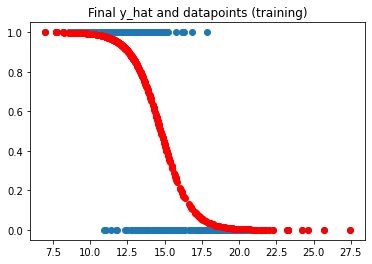

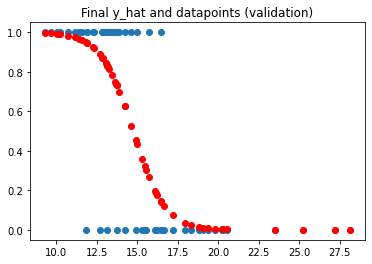

In [6]:
# we want to find the best values for bias and slope
# since we do not know them, let's initialize them to be
# random numbers from a normal distribution with zero mean
# and a small variance (much smaller than 1)

bias = # your code here
slope = # your code here

# now we can get y_hat for the training data
# challenge: can you do this with linear algebra multiplying a vector 
# (containing the bias and slope) by a matrix containing the datapoints?
score = # your code here
y_hat = # your code here

# let's visualize y_hat and the datapoints
plt.scatter(X_tr,y_tr)
plt.scatter(X_tr, y_hat, c='r')
plt.title('Initial y_hat and datapoints')
plt.show()

# define the learning rate
learning_rate = # your code here

# now we put everything in a for loop, so that we can repeat the process
Niters = # your code here

for iter in range(Niters):
  
  # calculate the y_hat with the slope and bias values
  # for the training set
  score = # your code here
  y_hat = # your code here
  # and also the cost function
  J = # your code here
  
  # now do the same for the validation set
  score = # your code here
  y_hat_vl = # your code here
  J_vl = # your code here

  # update the bias and slope terms
  dJdbias = # your code here
  dJdslope = # your code here
  bias = bias - learning_rate*dJdbias
  slope = slope - learning_rate*dJdslope  

  print('At iteration No. ' + str(iter) + ' ,the cross-entropy (training) cost is: ', J)
  print('------------------------------ the cross-entropy (validation) cost is: ', J_vl)

# let's visualize y_hat and the datapoints
# after training
plt.scatter(X_tr,y_tr)
plt.scatter(X_tr, y_hat, c='r')
plt.title('Final y_hat and datapoints (training)')
plt.show()
plt.scatter(X_vl,y_vl)
plt.scatter(X_vl, y_hat_vl, c='r')
plt.title('Final y_hat and datapoints (validation)')
plt.show()

In [9]:
# now we calculate the accuracy

# to do this, we need to turn the values 
# in y_hat and y_hat_val into zeros and ones
# any value above 0.5 will become 1, and any value
# under 0.5 will become zero. 0.5 will become zero
# hint: use np.round

y_hat_0_1 = 
y_hat_vl_0_1 = 

print('The training accuracy is: ', np.sum(y_tr==y_hat_0_1/Ntrain)
print('The validation accuracy is: ', np.sum(y_vl==y_hat_vl_0_1/Nval)

0
0.881578947368421
0.8672566371681416


In [ ]:
# more things to try

# create plots to visualize the training and validation loss and accuracies
# as a function of training iterations. 

# if you use more than one feature, you should be able to bring the training
# cost very close to zero. How low can you bring the validation cost?

# how do you know when to stop your training? define a rule to stop your
# training, and substitute the for loop for a while loop